## IMPORT LIBRARIES

First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

## IMPORT LIBRARIES

import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, classification_report, silhouette_score


In [1]:
#Type the above code snippet in this code cell and click Run.
#import pandas................
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score





In [2]:
#Install seaborn if not installed
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## About Dataset
Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

Customer ID

Gender

Age

Annual Income

Spending Score - Score assigned by the shop, based on customer behavior and spending nature

Profession

Work Experience - in years

Family Size

## LOAD DATASET
We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.


dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Customers-Dataset/main/Customers.csv")

In [3]:
#Type the above code snippet in this code cell and click Run.
#dataset=................
dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Customers-Dataset/main/Customers.csv")


![Screenshot%202023-05-26%20102047.png](attachment:Screenshot%202023-05-26%20102047.png)

## EDA

Exploratory Data Analysis is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows you to get a better feel of your data and find useful patterns in it.

#### Summarize the Dataset
Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

    1.Dimensions of the dataset.
    2.Peek at the data itself.
    3.Statistical summary of all attributes.
    4.Breakdown of the data by the class variable.
Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

#### Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.


#### Shape
The DataFrame.shape attribute in Pandas enables us to obtain the shape of a DataFrame. For example, if a DataFrame has a shape of (80, 10) , this implies that the DataFrame is made up of 80 rows and 10 columns of data.

dataset.shape

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................

dataset.shape


(2000, 10)

dataset.head()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................
dataset.head(10)


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family Size,Spending_Category,Invoice_Number
0,1,Male,19,15000,39,Healthcare,1,4,Average,458984
1,2,Male,21,35000,81,Engineer,3,3,High,458994
2,3,Female,20,86000,6,Engineer,1,1,Low,458994
3,4,Female,23,59000,77,Lawyer,0,2,High,458997
4,5,Female,31,38000,40,Entertainment,2,6,Average,458999
5,6,Female,22,58000,76,Artist,0,2,High,459007
6,7,Female,35,31000,6,Healthcare,1,3,Low,459008
7,8,Female,23,84000,94,Healthcare,1,3,High,459008
8,9,Male,64,97000,3,Engineer,0,3,Low,459009
9,10,Female,30,98000,72,Artist,1,4,High,459010


dataset.tail()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................
dataset.tail()


,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family Size,Spending_Category,Invoice_Number
1995,1996,Female,71,184387,40,Artist,8,7,Average,461768
1996,1997,Female,91,73158,32,Doctor,7,7,Average,461773
1997,1998,Male,87,90961,14,Healthcare,9,2,Low,461774
1998,1999,Male,77,182109,4,Executive,7,2,Low,461775
1999,2000,Male,90,110610,52,Entertainment,5,2,High,461775


### Statistical Summary
Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.




dataset.info()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         2000 non-null   int64 
 1   Gender             2000 non-null   object
 2   Age                2000 non-null   int64 
 3   Annual_Income      2000 non-null   int64 
 4   Spending_Score     2000 non-null   int64 
 5   Profession         1965 non-null   object
 6   Work_Experience    2000 non-null   int64 
 7   Family Size        2000 non-null   int64 
 8   Spending_Category  2000 non-null   object
 9   Invoice_Number     2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


dataset.describe()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................

dataset.describe()

,CustomerID,Age,Annual_Income,Spending_Score,Work_Experience,Family Size,Invoice_Number
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500,461389.611000
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749,1529.636635
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,458984.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000,459890.500000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000,461425.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000,462654.750000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000,464252.000000


## Univariate Analysis
Univariate analysis is the simplest form of analysis where we explore a single variable. Univariate analysis is performed to describe the data in a better way. We perform Univariate analysis of Numerical and categorical variables differently because plotting uses different plots.

#### Categorical Data
##### CountPlot

Countplot is basically a count of frequency plot in form of a bar graph. It plots the count of each category in a separate bar. When we use the pandas’ value counts function on any column, It is the same visual form of the value counts function.


##### Seaborn
Python Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning tasks. You build it on top of the matplotlib data visualization library and can perform exploratory analysis.

!pip install seaborn

import seaborn as sns

sns.countplot(x = 'Profession', data=dataset, order = dataset['Profession'].value_counts().index)

<Axes: xlabel='Profession', ylabel='count'>

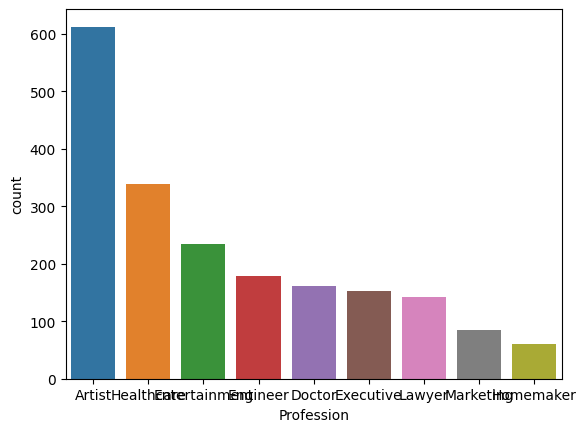

In [ ]:
#Type the above code snippet in this code cell and click Run.
#import seaborn................

sns.countplot(x = 'Profession', data=dataset, order = dataset['Profession'].value_counts().index)


##### Pie Chart

The pie chart is also the same as the countplot, only gives you additional information about the percentage presence of each category in data, means which category is getting how much weightage in data. If we check the Gender column we get an overview about the male and female shoppers.

dataset['Gender'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()

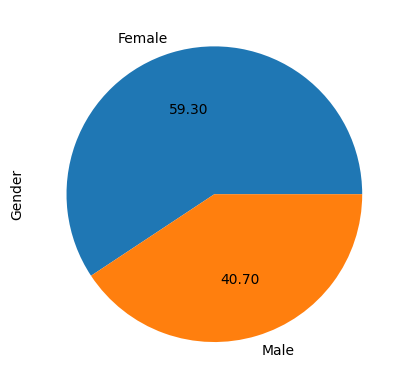

In [ ]:
#Type the above code snippet in this code cell and click Run.
#import dataset['Gender']................


dataset['Gender'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()

#### Numerical Data

##### Histogram

A histogram is a value distribution plot of numerical columns. It basically creates bins in various ranges in values and plots it where we can visualize how values are distributed. We can have a look where more values lie like in positive, negative, or at the center(mean).

plt.hist(dataset['Age'], bins=10)

plt.show()

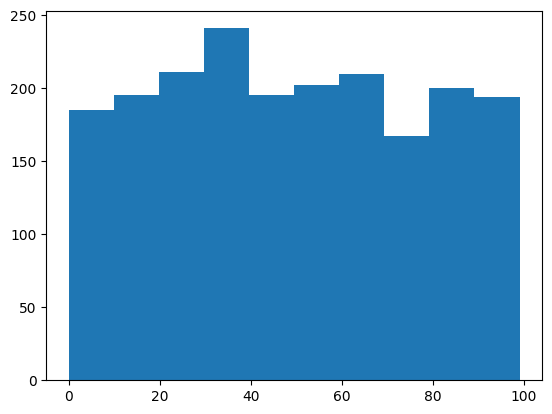

In [ ]:
#Type the above code snippet in this code cell and click Run.
# plt.hist................
plt.hist(dataset['Age'], bins=10)

plt.show()


##### Histplot

Histplot is also known as the second Histogram because it is a slight improvement version of the Histogram. Distplot gives us a KDE(Kernel Density Estimation) over histogram which explains PDF(Probability Density Function) which means what is the probability of each value occurring in this column. If you have study statistics before then definitely you should know about PDF function.

sns.histplot(data=dataset, x='Spending_Score',color='pink',kde=True)

<Axes: xlabel='Spending_Score', ylabel='Count'>

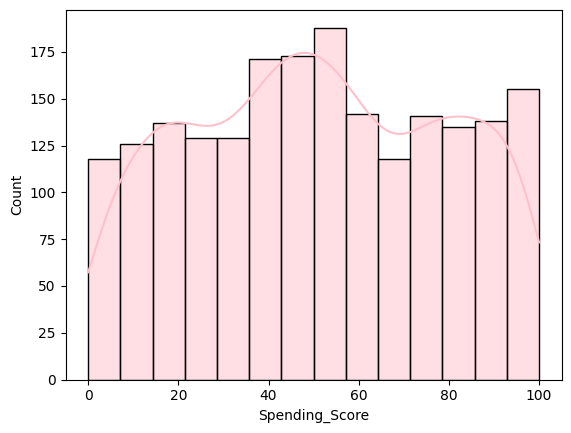

In [ ]:
#Type the above code snippet in this code cell and click Run.
# sns.histplot................
sns.histplot(data=dataset, x='Spending_Score',color='pink',kde=True)


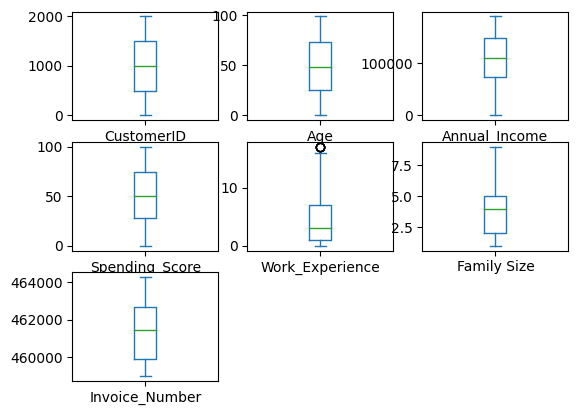

In [ ]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

## Bivariate/ Multivariate Analysis
We dicussed about various plots to explore single categorical and numerical data. Bivariate Analysis is used when we have to explore the relationship between 2 different variables and we have to do this because, in the end, our main task is to explore the relationship between variables to build a powerful model. And when we analyze more than 2 variables together then it is known as Multivariate Analysis. we will work on different plots for Bivariate as well on Multivariate Analysis.

#### Numerical and Numerical
First, let’s explore the plots when both the variable is numerical.

###### Scatter Plot
To plot the relationship between two numerical variables scatter plot is a simple plot to do. Let us see the relationship between the total bill and tip provided using a scatter plot.

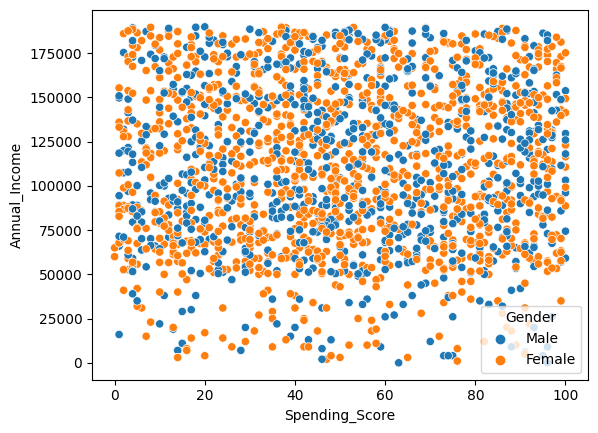

In [ ]:
sns.scatterplot(data=dataset,x=dataset["Spending_Score"], y=dataset["Annual_Income"], hue=dataset["Gender"])
plt.show()

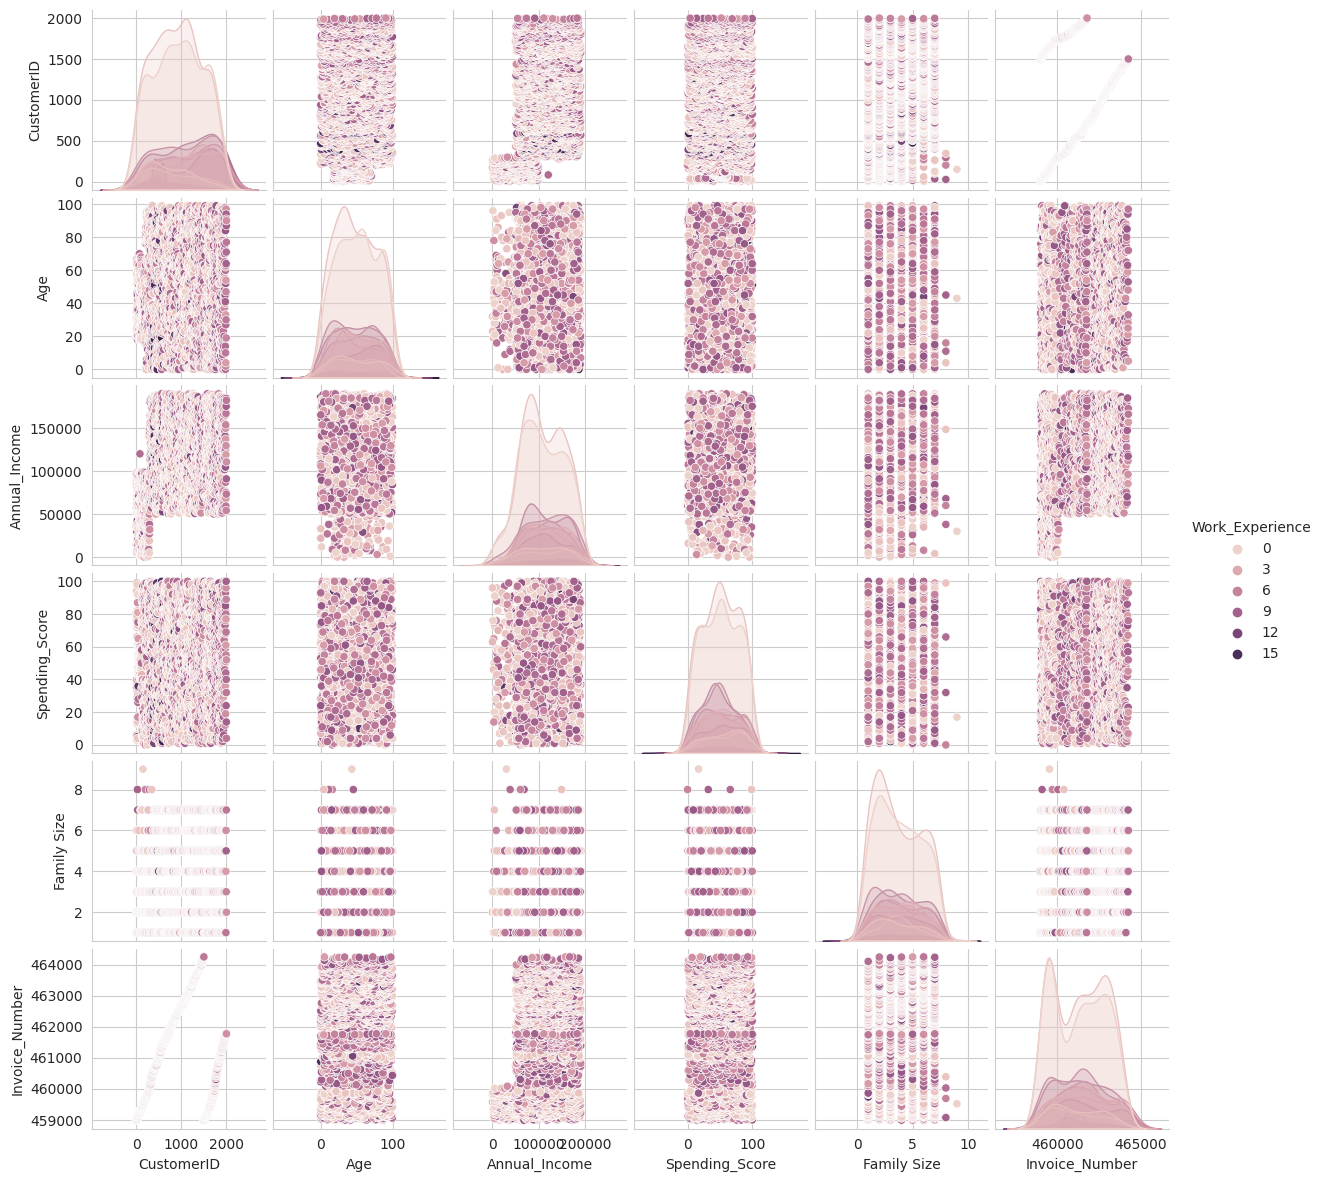

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="Work_Experience", height=2)
plt.show()

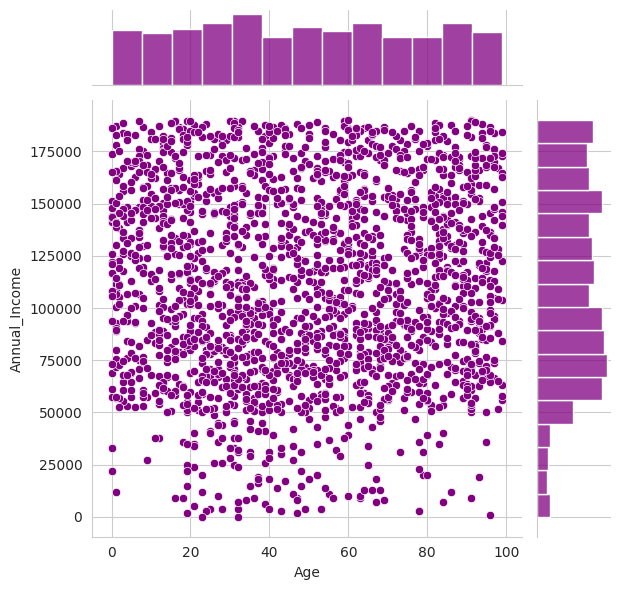

In [ ]:
sns.jointplot(data=dataset, x='Age', y='Annual_Income',color='purple')

<ipython-input-16-61d2d38a68b8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x='Work_Experience',y='Annual_Income',ci=None)


<Axes: xlabel='Work_Experience', ylabel='Annual_Income'>

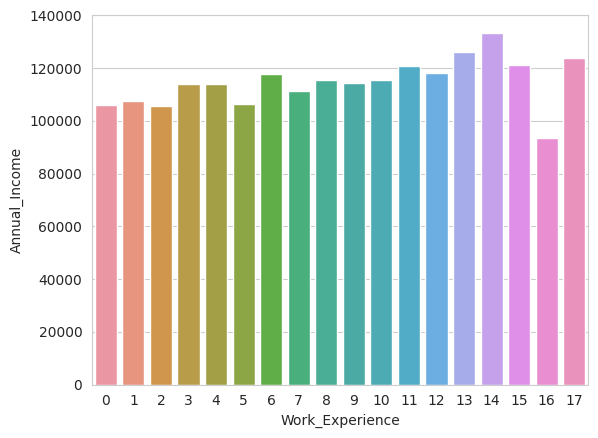

In [ ]:
sns.barplot(data=dataset, x='Work_Experience',y='Annual_Income',ci=None)

<Axes: xlabel='Spending_Category', ylabel='count'>

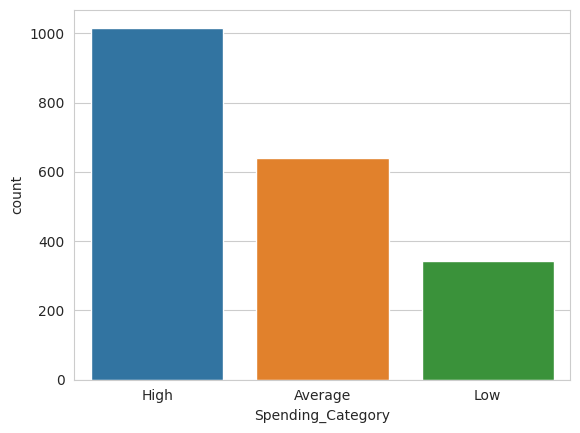

In [ ]:
sns.countplot(x = 'Spending_Category', data=dataset, order = dataset['Spending_Category'].value_counts().index)

# DATA ENGINEERING

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family Size,Spending_Category,Invoice_Number
0,1,Male,19,15000,39,Healthcare,1,4,Average,458984
1,2,Male,21,35000,81,Engineer,3,3,High,458994
2,3,Female,20,86000,6,Engineer,1,1,Low,458994
3,4,Female,23,59000,77,Lawyer,0,2,High,458997
4,5,Female,31,38000,40,Entertainment,2,6,Average,458999


In [ ]:
dataset=dataset.drop(['CustomerID'],axis=1)

In [ ]:
dataset = dataset.drop(['Spending_Score', 'Invoice_Number'], axis=1)

In [ ]:
dataset.head()

,Gender,Age,Annual_Income,Profession,Work_Experience,Family Size,Spending_Category
0,Male,19,15000,Healthcare,1,4,Average
1,Male,21,35000,Engineer,3,3,High
2,Female,20,86000,Engineer,1,1,Low
3,Female,23,59000,Lawyer,0,2,High
4,Female,31,38000,Entertainment,2,6,Average


In [ ]:
dataset.groupby('Spending_Category').size()

Spending_Category
Average     639
High       1017
Low         344
dtype: int64

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
ds_low = dataset[(dataset['Spending_Category']=="Low")] #low assigned to a variable
ds_average = dataset[(dataset['Spending_Category']=="Average")] #
ds_high = dataset[(dataset['Spending_Category']=="High")]
# upsample minority class
ds_average_upsampled = resample(ds_average,
                                 replace=True,    # sample with replacement
                                 n_samples= 1017, # to match majority class
                                 random_state=42)  # reproducible results
                                  #average upsampled and assigned to another variable
                                  #ds avrage is upsampled, data is duplicated and sampled upto 1017(high) with a random state,
ds_low_upsampled = resample(ds_low,
                                 replace=True,    # sample with replacement
                                 n_samples= 1017, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
ds = pd.concat([ds_average_upsampled,ds_low_upsampled, ds_high]) # average and low upsampled, high no need to, and concatinated to another data set

In [ ]:
ds.groupby('Spending_Category').size()

Spending_Category
Average    1017
High       1017
Low        1017
dtype: int64

In [ ]:
ds.duplicated().sum()   # to find total duplicated values

1220

<Axes: xlabel='Spending_Category', ylabel='count'>

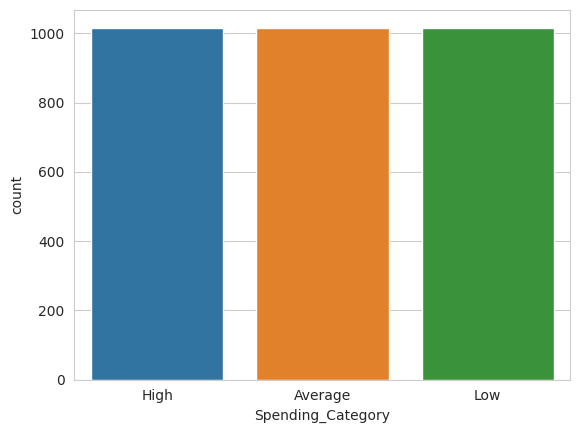

In [ ]:
sns.countplot(x = 'Spending_Category', data=ds, order = dataset['Spending_Category'].value_counts().index)

In [ ]:
ds.isnull().sum() #finding is there exist null values

Gender                0
Age                   0
Annual_Income         0
Profession           62
Work_Experience       0
Family Size           0
Spending_Category     0
dtype: int64

In [ ]:
ds["Profession"].fillna("Unknown", inplace=True)  #filling the null values with "unknown"

In [ ]:
ds.isnull().sum()

Gender               0
Age                  0
Annual_Income        0
Profession           0
Work_Experience      0
Family Size          0
Spending_Category    0
dtype: int64

In [ ]:
ds

,Gender,Age,Annual_Income,Profession,Work_Experience,Family Size,Spending_Category
348,Female,24,151085,Marketing,2,5,Average
1386,Female,82,62951,Lawyer,8,2,Average
853,Female,11,143047,Executive,1,3,Average
369,Female,36,87353,Entertainment,1,5,Average
229,Male,15,94000,Healthcare,7,2,Average
...,...,...,...,...,...,...,...
1990,Female,30,166983,Artist,7,3,High
1991,Female,97,129444,Entertainment,5,6,High
1993,Female,64,175254,Artist,9,5,High
1994,Female,19,54121,Engineer,6,3,High


<Axes: xlabel='Profession', ylabel='count'>

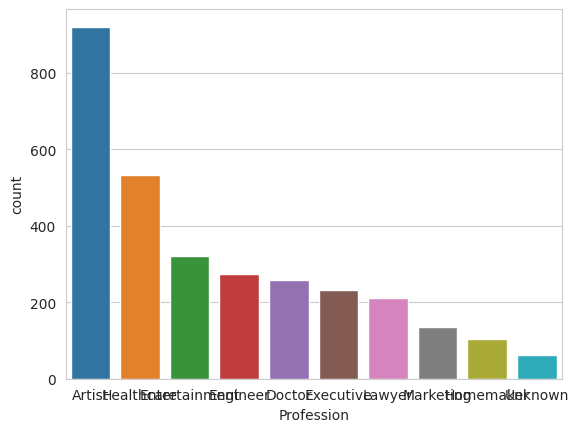

In [ ]:
sns.countplot(x = 'Profession', data=ds, order = ds['Profession'].value_counts().index)

In [ ]:
ds['Profession'].unique() # checking what are the profession we have

array(['Marketing', 'Lawyer', 'Executive', 'Entertainment', 'Healthcare',
       'Engineer', 'Artist', 'Doctor', 'Unknown', 'Homemaker'],
      dtype=object)

In [ ]:
prof = {"Marketing":0,'Lawyer':1, 'Executive':2, 'Entertainment':3, 'Healthcare':4,
       'Engineer':5, 'Artist':6, 'Doctor':7, 'Unknown':8, 'Homemaker':9} # assigning index to professions as dictionary(key value), so we are converting it as numerical data
ds['Profession'] = ds['Profession'].map(prof) # and we are mapping this dictionary with the dataset to replace the values

In [ ]:
ds.head()

,Gender,Age,Annual_Income,Profession,Work_Experience,Family Size,Spending_Category
348,Female,24,151085,0,2,5,Average
1386,Female,82,62951,1,8,2,Average
853,Female,11,143047,2,1,3,Average
369,Female,36,87353,3,1,5,Average
229,Male,15,94000,4,7,2,Average


In [ ]:
ds['Gender'].unique() #checking what are the gender we have

array(['Female', 'Male'], dtype=object)

In [ ]:
gender = {"Male":0,'Female':1}
ds['Gender'] = dataset['Gender'].map(gender)

In [ ]:
ds.head()

,Gender,Age,Annual_Income,Profession,Work_Experience,Family Size,Spending_Category
348,1,24,151085,0,2,5,Average
1386,1,82,62951,1,8,2,Average
853,1,11,143047,2,1,3,Average
369,1,36,87353,3,1,5,Average
229,0,15,94000,4,7,2,Average


In [ ]:
scaled_ds = ds[['Gender', 'Age', 'Annual_Income', 'Profession', 'Work_Experience','Family Size']] #

In [ ]:

scaler=StandardScaler()
scaled_features = scaler.fit_transform(scaled_ds)

In [ ]:
scaled_ds

,Gender,Age,Annual_Income,Profession,Work_Experience,Family Size
348,1,24,151085,0,2,5
1386,1,82,62951,1,8,2
853,1,11,143047,2,1,3
369,1,36,87353,3,1,5
229,0,15,94000,4,7,2
...,...,...,...,...,...,...
1990,1,30,166983,6,7,3
1991,1,97,129444,3,5,6
1993,1,64,175254,6,9,5
1994,1,19,54121,5,6,3


# DATA MODELLING & EVALUATION

In [ ]:
x = ds.iloc[:,0:6].values  # 0 to 6-1 columns are allocated to x
y = ds.iloc[:,6].values  #last column "category " allocated to y
# ie actual data and result is splitted

In [ ]:
x

array([[     1,     24, 151085,      0,      2,      5],
       [     1,     82,  62951,      1,      8,      2],
       [     1,     11, 143047,      2,      1,      3],
       ...,
       [     1,     64, 175254,      6,      9,      5],
       [     1,     19,  54121,      5,      6,      3],
       [     0,     90, 110610,      3,      5,      2]])

In [ ]:
y

array(['Average', 'Average', 'Average', ..., 'High', 'High', 'High'],
      dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (2135, 6)
y_train:  (2135,)
x_test:  (916, 6)
y_test:  (916,)


#### Logistic Regression

In [ ]:
model_lr = LogisticRegression(max_iter = 600) #loading the algorith

In [ ]:
model_lr.fit(x_train, y_train)# fitting both training data, x and Y part


LogisticRegression(max_iter=600)

In [ ]:
y_pred_lr = model_lr.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.3318777292576419


#### K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier()

In [ ]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model_knn.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.5120087336244541


#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = model_dt.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.7074235807860262


#### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()

In [ ]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.35043668122270744


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(gamma='auto')

In [ ]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [ ]:
y_pred_svc = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.35043668122270744


#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [ ]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [ ]:
y_pred_rf = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.35043668122270744


### Prediction

In [ ]:
Xnew = [[1,24,15000,0,2,5]]

ynew = model_dt.predict(Xnew)

print(ynew)

['High']


In [ ]:
y_test

array(['Average', 'High', 'High', 'Average', 'Average', 'Low', 'Average',
       'Average', 'Average', 'Low', 'Low', 'High', 'Average', 'Low',
       'High', 'Low', 'Average', 'Low', 'Low', 'High', 'Low', 'Low',
       'Average', 'High', 'Average', 'Low', 'Low', 'Average', 'Average',
       'Average', 'Average', 'High', 'High', 'Low', 'Low', 'High',
       'Average', 'Low', 'High', 'Low', 'Average', 'Average', 'High',
       'High', 'Average', 'Low', 'Average', 'Average', 'Low', 'Average',
       'Average', 'High', 'Low', 'Average', 'High', 'Low', 'Average',
       'High', 'Average', 'High', 'Low', 'Low', 'Average', 'High', 'Low',
       'High', 'High', 'High', 'Average', 'High', 'Average', 'Low', 'Low',
       'Low', 'High', 'Average', 'Average', 'Low', 'Average', 'Low',
       'High', 'Low', 'High', 'Average', 'Average', 'Average', 'Average',
       'Average', 'Average', 'High', 'High', 'High', 'Average', 'Average',
       'Average', 'Average', 'Average', 'High', 'High', 'Average', '

In [ ]:
y_pred_dt

array(['High', 'Low', 'High', 'Average', 'Average', 'Low', 'High',
       'Average', 'Average', 'Low', 'Low', 'High', 'Average', 'Average',
       'High', 'Low', 'Average', 'Low', 'Low', 'High', 'Low', 'Low',
       'Average', 'Average', 'Average', 'Low', 'Low', 'Low', 'Average',
       'High', 'Average', 'Average', 'High', 'High', 'Low', 'High',
       'Average', 'Low', 'High', 'Low', 'High', 'High', 'High', 'Low',
       'High', 'Low', 'Average', 'Average', 'Low', 'Average', 'High',
       'Average', 'Low', 'Average', 'High', 'Low', 'High', 'Average',
       'High', 'High', 'Low', 'Low', 'Average', 'High', 'Low', 'Low',
       'High', 'Average', 'Average', 'High', 'Average', 'Low', 'Average',
       'Low', 'Average', 'High', 'Average', 'Low', 'Average', 'Low',
       'High', 'Low', 'Low', 'Average', 'Average', 'Average', 'Low',
       'Low', 'High', 'High', 'Low', 'Average', 'Low', 'Average',
       'Average', 'High', 'Average', 'Low', 'High', 'Average', 'Low',
       'High', 'Averag

### DATA ANALYTICS

In [ ]:
l1 = list(y_test)
l2 = list(y_pred_dt)

In [ ]:
pred = {}
for i, score in enumerate(l1):
  pred[i] = score

In [ ]:
pred1 = {}
for i, score in enumerate(l2):
  pred1[i] = score

In [ ]:
dct={'y_test':pred , 'y_pred_dt': pred1}

In [ ]:
data = pd.DataFrame(dct)

In [ ]:
data.to_excel("output.xlsx")